In [2]:
# main libraries
import pandas as pd
import numpy as np
import time
import pickle
# visual libraries
from matplotlib import pyplot as plt
# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, classification_report, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
# To save and load models
from joblib import dump, load
import scikitplot as skplt


In [1]:
pip install scikit-plot

In [5]:
df = pd.read_csv('/content/drive/My Drive/GrupoEstudiantesAgo-Dic2020/IDS/DataSets/CICDoS2017/Pre-processed/dataTrain.csv')
df_test = pd.read_csv('/content/drive/My Drive/GrupoEstudiantesAgo-Dic2020/IDS/DataSets/CICDoS2017/Pre-processed/dataTest.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = df.drop(columns=['Unnamed: 0', 'Src.IP', 'Src.Port', 'Dst.IP', 'Dst.Port', 'Protocol'])


In [7]:
df_test = df_test.drop(columns=['Unnamed: 0', 'Src.IP', 'Src.Port', 'Dst.IP', 'Dst.Port', 'Protocol'])


In [8]:
y = df.loc[:,['Label']].values
y_test = df_test.loc[:,['Label']].values

In [9]:
print(df.columns)

Index(['Flow.Duration', 'Tot.Fwd.Pkts', 'Tot.Bwd.Pkts', 'TotLen.Fwd.Pkts',
       'TotLen.Bwd.Pkts', 'Fwd.Pkt.Len.Max', 'Fwd.Pkt.Len.Min',
       'Fwd.Pkt.Len.Std', 'Bwd.Pkt.Len.Max', 'Bwd.Pkt.Len.Min',
       'Bwd.Pkt.Len.Std', 'Flow.Byts.s', 'Flow.Pkts.s', 'Flow.IAT.Mean',
       'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Mean',
       'Fwd.IAT.Std', 'Fwd.IAT.Min', 'Bwd.IAT.Tot', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Fwd.Pkts.s', 'Bwd.Pkts.s', 'Pkt.Len.Min', 'Pkt.Len.Max',
       'Pkt.Len.Mean', 'Pkt.Len.Std', 'Pkt.Len.Var', 'FIN.Flag.Cnt',
       'SYN.Flag.Cnt', 'RST.Flag.Cnt', 'PSH.Flag.Cnt', 'Down.Up.Ratio',
       'Bwd.Pkts.b.Avg', 'Bwd.Blk.Rate.Avg', 'Subflow.Fwd.Pkts',
       'Subflow.Fwd.Byts', 'Subflow.Bwd.Byts', 'Init.Fwd.Win.Byts',
       'Init.Bwd.Win.Byts', 'Fwd.Seg.Size.Min', 'Idle.Mean', 'Idle.Std',
       'Idle.Min', 'Label'],
      dtype='object')


In [10]:
x = df.loc[:, [ 'Flow.Duration', 'Tot.Fwd.Pkts', 'Tot.Bwd.Pkts', 'TotLen.Fwd.Pkts',
       'TotLen.Bwd.Pkts', 'Fwd.Pkt.Len.Max', 'Fwd.Pkt.Len.Min',
       'Fwd.Pkt.Len.Std', 'Bwd.Pkt.Len.Max', 'Bwd.Pkt.Len.Min',
       'Bwd.Pkt.Len.Std', 'Flow.Byts.s', 'Flow.Pkts.s', 'Flow.IAT.Mean',
       'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Mean',
       'Fwd.IAT.Std', 'Fwd.IAT.Min', 'Bwd.IAT.Tot', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Fwd.Pkts.s', 'Bwd.Pkts.s', 'Pkt.Len.Min', 'Pkt.Len.Max',
       'Pkt.Len.Mean', 'Pkt.Len.Std', 'Pkt.Len.Var', 'FIN.Flag.Cnt',
       'SYN.Flag.Cnt', 'RST.Flag.Cnt', 'PSH.Flag.Cnt', 'Down.Up.Ratio',
       'Bwd.Pkts.b.Avg', 'Bwd.Blk.Rate.Avg', 'Subflow.Fwd.Pkts',
       'Subflow.Fwd.Byts', 'Subflow.Bwd.Byts', 'Init.Fwd.Win.Byts',
       'Init.Bwd.Win.Byts', 'Fwd.Seg.Size.Min', 'Idle.Mean', 'Idle.Std',
       'Idle.Min']].values

x_test = df_test.loc[:, [ 'Flow.Duration', 'Tot.Fwd.Pkts', 'Tot.Bwd.Pkts', 'TotLen.Fwd.Pkts',
       'TotLen.Bwd.Pkts', 'Fwd.Pkt.Len.Max', 'Fwd.Pkt.Len.Min',
       'Fwd.Pkt.Len.Std', 'Bwd.Pkt.Len.Max', 'Bwd.Pkt.Len.Min',
       'Bwd.Pkt.Len.Std', 'Flow.Byts.s', 'Flow.Pkts.s', 'Flow.IAT.Mean',
       'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Mean',
       'Fwd.IAT.Std', 'Fwd.IAT.Min', 'Bwd.IAT.Tot', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Fwd.Pkts.s', 'Bwd.Pkts.s', 'Pkt.Len.Min', 'Pkt.Len.Max',
       'Pkt.Len.Mean', 'Pkt.Len.Std', 'Pkt.Len.Var', 'FIN.Flag.Cnt',
       'SYN.Flag.Cnt', 'RST.Flag.Cnt', 'PSH.Flag.Cnt', 'Down.Up.Ratio',
       'Bwd.Pkts.b.Avg', 'Bwd.Blk.Rate.Avg', 'Subflow.Fwd.Pkts',
       'Subflow.Fwd.Byts', 'Subflow.Bwd.Byts', 'Init.Fwd.Win.Byts',
       'Init.Bwd.Win.Byts', 'Fwd.Seg.Size.Min', 'Idle.Mean', 'Idle.Std',
       'Idle.Min']].values

In [11]:
# Standarize data
x = StandardScaler().fit_transform(x)
x_test = StandardScaler().fit_transform(x_test)


In [12]:
# PCA for 85% is 16 features
pca = PCA(.85)
pca.fit(x)
pca.n_components_ 

16

In [13]:
x_train = pca.transform(x)
y_train = np.ravel(y,order='C')

x_test = pca.transform(x_test)
y_test = np.ravel(y_test,order='C')

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(102692, 16)
(102692,)
(55873, 16)
(55873,)


In [ ]:
# Recording testing accuracy to set best K
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  scores[k] = metrics.accuracy_score(y_test, y_pred)
  scores_list.append(metrics.accuracy_score(y_test, y_pred))

[0.9516761226352621, 0.9516761226352621, 0.9510318042703989, 0.9507096450879674, 0.9507991337497539, 0.9501369176525334, 0.9506738496232527, 0.9510139065380416, 0.9513539634528305, 0.9514792475793317, 0.951550838508761, 0.954146009700571, 0.9548082257977915, 0.9547187371360049, 0.9543965779535732, 0.9545218620800745, 0.9544323734182879, 0.9541997028976429, 0.9540207255740698, 0.9539670323769979, 0.9539312369122832, 0.9536985663916382, 0.9536448731945663, 0.9535016913357077, 0.9533048162797774]


Text(0, 0.5, 'Testing accuracy')

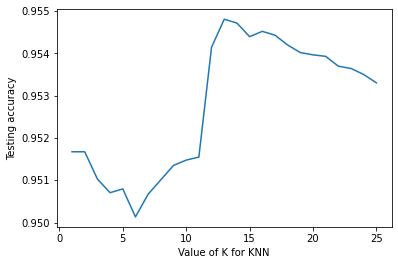

In [ ]:
print(scores_list)

plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing accuracy')
# choose 13

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)



Load model and test

In [18]:
import joblib
knnModel = joblib.load('/content/drive/MyDrive/GrupoEstudiantesAgo-Dic2020/IDS/Aplicaciones/Modelling/Best Model Objects/CICDoS2017/knn/knn_cic2017.joblib')
knnModel
print(knnModel.get_params(deep=True))

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 13, 'p': 2, 'weights': 'uniform'}


Evaluation on training dataset

In [ ]:
y_pred = knnModel.predict(x_train)
accuracy = metrics.accuracy_score(y_train, y_pred)
print(accuracy)
# precision recall and fscore
precision_recall_fscore_support(y_train, y_pred, average='weighted')

0.9914988509328867


(0.9915518806544947, 0.9914988509328867, 0.9915122084367891, None)

Evaluation on the testing

In [ ]:
y_pred = knnModel.predict(x_test)
print("***************************************************************")    
print("Assessment: n classes") 
# accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)
# precision recall and fscore
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

print("***************************************************************")    
print("Assessment: 2 classes") 
TP=TN=FP=FN=0
y_test2c = np.array(y_test)
y_test2c [y_test2c>=1] = 1;
y_hat2c = np.array(y_pred)
y_hat2c [y_hat2c>=1] = 1;
print("Accuracy", accuracy_score(y_test2c, y_hat2c))
print("Precision", precision_score(y_test2c, y_hat2c, average='weighted'))
print("F1-SCORE", f1_score(y_test2c, y_hat2c, average='weighted'))
print("RECALL (TPR)", recall_score(y_test2c, y_hat2c, average='weighted'))


***************************************************************
Assessment: n classes
0.9548082257977915
(0.977175060237758, 0.9548082257977915, 0.9545013941325976, None)
***************************************************************
Assessment: 2 classes
Accuracy 0.9936463050131549
Precision 0.9937132827216115
F1-SCORE 0.9936624190872406
RECALL (TPR) 0.9936463050131549


In [ ]:
TP=TN=FP=FN=0
for k in range (0,len(y_pred)):
    ylabel     = y_test[k];
    ypredicted = y_pred[k];
    if ypredicted == 0 and ylabel == 0:
        TN = TN + 1
    elif ypredicted > 0 and ylabel > 0:
        TP = TP + 1
    elif ypredicted > 0 and ylabel == 0:
        FP = FP + 1
    elif ypredicted == 0 and ylabel > 0:
        FN = FN + 1
    else:
        print('any')
print("ACCURACY", (TP+TN)/(TP+TN+FP+FN))
print("F1-SCORE", (2*TP)/(2*TP+FP+FN))
print("FALSE POS. RATE (FPR)", (FP)/(FP+TN))
print("RECALL (TPR)", (TP)/(TP+FN))

ACCURACY 0.9936463050131549
F1-SCORE 0.9868523388022666
FALSE POS. RATE (FPR) 0.006545334683210511
RECALL (TPR) 0.9942537313432835


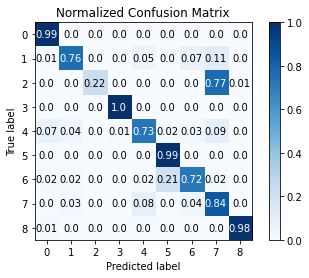

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred,normalize="True")

In [ ]:
# Save model
dump(knn, 'knn_cic2017.joblib') 


['knn_cic2017.joblib']

Text(0, 0.5, 'No. Attack')

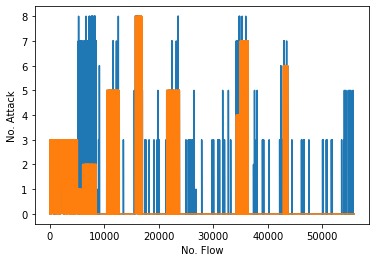

In [ ]:
#Plot Orange test vs Blue predictions
plt.plot(y_pred)
plt.xlabel('No. Flow')
plt.ylabel('No. Attack')
plt.plot(y_test)
plt.xlabel('No. Flow')
plt.ylabel('No. Attack')


Text(0, 0.5, 'No. Attack')

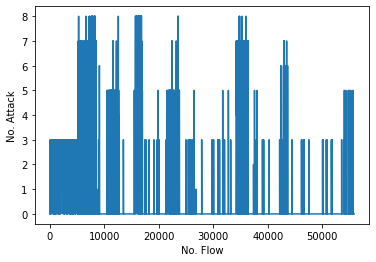

In [ ]:
#Predictions
plt.plot(y_pred)
plt.xlabel('No. Flow')
plt.ylabel('No. Attack')

Text(0, 0.5, 'No. Attack')

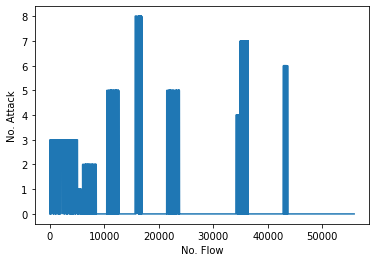

In [ ]:
#Test
plt.plot(y_test)
plt.xlabel('No. Flow')
plt.ylabel('No. Attack')

# Time complexity Analysis



In [19]:
import timeit

def prediction():
  yhat = knnModel.predict(x_test[0:10000]);

# load model and testing data

execution_time = timeit.repeat(prediction, number=1, repeat=100)
print('Average Flow/s: ', 1/((min(execution_time))/10000))



Average Flow/s:  6117.707571444342


In [16]:
y = x_test[0:10000]
y.shape

(10000, 16)